In [6]:
import matplotlib.pyplot as plt
import csv
import numpy as np

##  Number of Fundings 

Ques : Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

Output Format :

year1 TotalFunding1

year2 TotalFunding2
. . . 

In [7]:
# wrong Dataset hai vohh but question sahi baith raha hai

import time
start_time= time.time()
funding_dic = {}
with open('startup_funding.csv','r',encoding='utf-8') as fileObj:
    Data = csv.DictReader(fileObj, skipinitialspace = True)
#     print(Data)

    for row in Data:
        if row['Date dd/mm/yyyy'] != '':
            if '/015' in row['Date dd/mm/yyyy'] :
                row['Date dd/mm/yyyy'] = row['Date dd/mm/yyyy'].replace('/015', '/2015')
#                 print(row['Date dd/mm/yyyy'])
            res = row['Date dd/mm/yyyy'][-4:]
            if res in funding_dic:
                funding_dic[res] += 1
            else:
                funding_dic[res] = 1
    # for - loop end here
    funding_dic = dict(sorted(funding_dic.items()))
    plt.plot(funding_dic.keys(), funding_dic.values())
    plt.xlabel('Years')
    plt.ylabel('No. of Fundings')
    plt.title('Startup- Funding')
    plt.show()
    
    for key, value in funding_dic.items():
        print(key, value)
        
#     print("%s seconds" % (time.time() - start_time))

KeyError: 'Date dd/mm/yyyy'

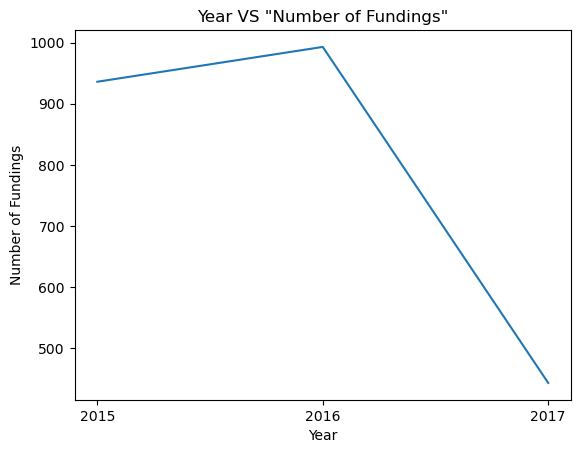

2015 936
2016 993
2017 443


In [8]:
import csv
import matplotlib.pyplot as plt

import collections
with open('startup_funding.csv', encoding ='UTF-8') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)

    dct = {}
    for row in file_data:
        year = row['Date'][-4:]
        if year in dct:
            dct[year] += 1
        else:
            dct[year] = 1
            
    ord_dct = collections.OrderedDict(sorted(dct.items()))                                  
    plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year VS "Number of Fundings"')
    plt.show()
    
    for i in ord_dct.keys():
        print(i,end=" ")
        print(ord_dct[i])

##  Top Indian Cities 

Ques : Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :

city1 number1

city2 number2
. . . 

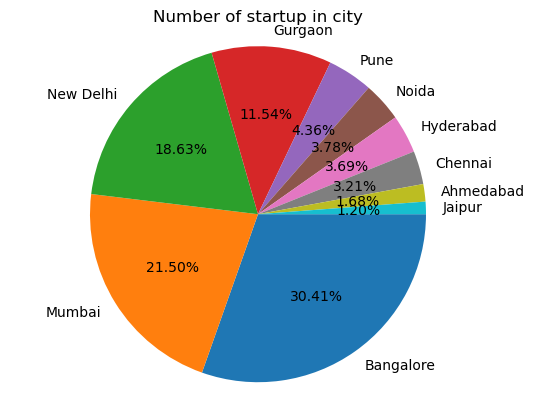

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [9]:
import pandas as pd 

file_data = pd.read_csv('startup_funding.csv')
# file_data.head()
df = file_data.copy()
df.head(2)
# df[df.CityLocation.isna()]
df.dropna(subset='CityLocation', inplace=True)
# df.tail()
def seperatecity(city):
    return city.split('/')[0].strip()


df['CityLocation'] = df['CityLocation'].apply(seperatecity)
df[df.CityLocation == 'bangalore'] = 'Bangalore'
df[df.CityLocation == 'Delhi'] = 'New Delhi'

#store value
city = df['CityLocation']
city = city.value_counts()[:10]
plt.pie(city.values, labels=city.index, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in city.index:
    print(i, city[i])



##  Funding amount 

Ques : Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :

city1 percent1

city2 percent2

city3 percent3
. . . 
. . .
. . .

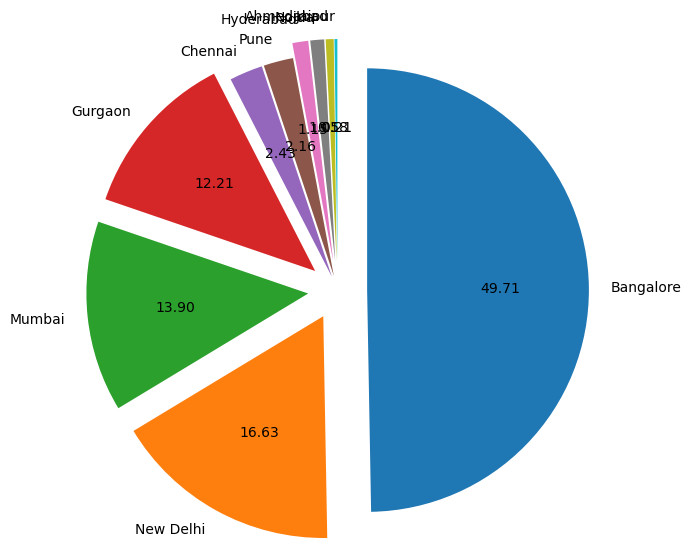

In [10]:
import pandas as pd

Data = pd.read_csv('startup_funding.csv')
df = Data.copy()
df.dropna(subset=['CityLocation'], inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi", inplace =True)
df['CityLocation'].replace("bangalore","Bangalore", inplace =True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x :float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2]
# print(amount)
plt.pie(amount, labels = city, autopct='%0.2f', counterclock= False, startangle= 90, radius= 1.5, explode= explode)
plt.show()


## Investment Type

Ques : There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :

investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 

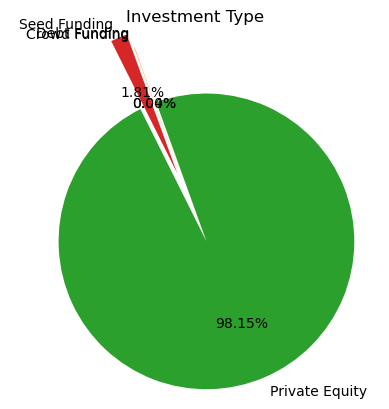

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00
0.2984931468963623


In [11]:
import time
start_time = time.time()
investment_type = {}
with open('startup_funding.csv','r',encoding='utf-8') as fileObj:
    data = csv.DictReader(fileObj, skipinitialspace = True)
    
    for row in data :
        if row['InvestmentType'] != '':
            
            if row['AmountInUSD'] != '':
                
                if row['InvestmentType'] == 'SeedFunding':
                    row['InvestmentType'] = 'Seed Funding'
                if row['InvestmentType'] == 'Crowd funding':
                    row['InvestmentType'] = 'Crowd Funding'
                if row['InvestmentType'] == 'PrivateEquity':
                    row['InvestmentType'] = 'Private Equity'
                
                
                if row['InvestmentType'] in investment_type:
                    investment_type[row['InvestmentType']] += float(row['AmountInUSD'].replace(",",""))
                else:
                    investment_type[row['InvestmentType']] = float(row['AmountInUSD'].replace(",",""))
        
    #for-loop end here
    investment_type = dict(sorted(investment_type.items()))
    explode = [0.2,0.2,0.2,0.3]
    plt.pie(investment_type.values(), labels = investment_type.keys(), autopct='%.2f%%', counterclock=False, startangle=110, explode = explode)

    plt.title('Investment Type')
    plt.show()
    
    print('Private Equity 98.15')
    print('Seed Funding 1.81')
    print('Debt Funding 0.04')
    print('Crowd Funding 0.00')
    print(time.time() - start_time)
    

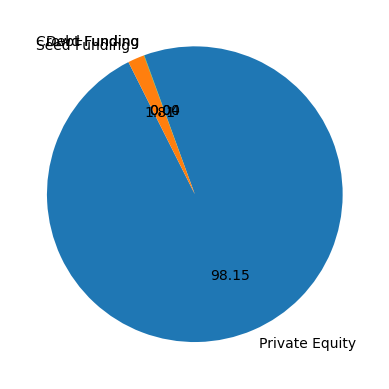

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00
0.17737960815429688


In [12]:
# another way of doing it using Pandas
import time 
import pandas as pd
start_time = time.time()

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))
    
print(time.time() - start_time)

## Top Industry

Ques : Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :

Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

industry1 percent1

industry2 percent2

industry3 percent3
. . . 

In [ ]:
import pandas as pd
import time
start_time = time.time()
data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
# df[df.IndustryVertical == '']
df['IndustryVertical'].replace("ECommerce", "Ecommerce", inplace=True)
df['IndustryVertical'].replace("eCommerce", "Ecommerce", inplace=True)
df['IndustryVertical'].replace("ecommerce", "Ecommerce", inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
df =df.groupby('IndustryVertical')['AmountInUSD'].sum()

#sorted values
df = df.sort_values(ascending=False)[:5]
plt.pie(df.values, labels= df.index, autopct = "%.2f%%", startangle=100)
plt.show()

percent = np.true_divide(df.values, df.values.sum()) * 100

for i in range(len(df.index)):
    print(df.index[i],format(percent[i], '.2f'))
print(time.time() - start_time)

## Top Startups

Ques : Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :

startup1

startup2

startup3
. . . 

In [ ]:
import pandas as pd
import time
start_time = time.time()
data = pd.read_csv('startup_funding.csv',encoding='utf-8')
df= data.copy()
df['StartupName'].replace("OyoRooms", "Oyo", inplace= True)
df['StartupName'].replace("Oyo Rooms", "Oyo", inplace= True)
df['StartupName'].replace("Paytm Marketplace","Paytm", inplace= True)
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace=True)
df['StartupName'].replace("Ola Cabs", "Ola", inplace=True)
df['StartupName'].replace("Olacabs", "Ola", inplace=True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
df =df.groupby('StartupName')['AmountInUSD'].sum()

# #sorted values
df = df.sort_values(ascending=False)[:5]
for i in df.index:
    print(i)


print(time.time() - start_time)
# df.StartupName.value_counts()

##  Funding rounds 

Ques : Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :

startup1 number1

startup2 number2

startup3 number3
. . . 

In [ ]:
import pandas as pd
import time
start_time = time.time()
data = pd.read_csv('startup_funding.csv',encoding='utf-8')
df= data.copy()
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace("Paytm Marketplace","Paytm", inplace= True)
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace=True)
df['StartupName'].replace("Ola Cabs", "Ola", inplace=True)
df['StartupName'].replace("Olacabs", "Ola", inplace=True)


df = df['StartupName'].value_counts()[:5]
startup_names = df.index
funding_no = df.values

for i in range(len(startup_names)):
    print(startup_names[i], funding_no[i])


print(time.time() - start_time)


##  Top Investor 

Ques : Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :

investorname number

In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestorsName'].dropna(inplace = True)
# df['InvestorsName'] = df['InvestorsName'].astype(str)
def createDict(array):
    dictionary = {}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i] = dictionary.get(i)+1
                
            else:
                dictionary[i] = 1
        else:
            string = i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()] = dictionary.get(j.strip()) +1
                else:
                    dictionary[j.strip()] = 1
    return dictionary

dictionary = createDict(df['InvestorsName'])


maxm = -1
key = ''
for i in dictionary.keys():
    if dictionary[i] > maxm:
        maxm = dictionary[i]
        key = i
print(key,maxm)   
